### 2D equations


The 2D linear convection equation is 

$$\frac{\partial u}{\partial t}+c_1\frac{\partial u}{\partial x} + c_2\frac{\partial u}{\partial y} = 0$$

in the same way, we can discretize it into a difference equation,  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c_1\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c_2\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

here, we used j for the index with respect to y coordinates.

$$u_{i,j}^{n+1} = u_{i,j}^n-c_1 \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c_2 \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

the initial conditions(domain is [0,d]X[0,d]):

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.4d \leq x, y \leq 0.6d \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ d \cr
y =  0,\ d \end{matrix}\end{cases}$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline

def convection2d(total_disx,total_disy,total_time, dx,dy,dt):
    nx = int(total_disx/dx)+1   
    ny = int(total_disy/dy)+1   
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    c1 = 1.0
    c2 = 1.0

    x = np.linspace(0, total_disx, nx)
    y = np.linspace(0, total_disy, ny)

    u = np.ones((nt,nx, ny),dtype=np.float64) 
    for i in range(nx):
        for j in range(ny):
            if x[i]>=0.4*total_disx and x[i]<=0.6*total_disx and y[j] >= 0.4*total_disy and y[j]<= 0.6*total_disy: u[0,i,j]=2.0
    
    for n in range(1,nt): ##loop across number of time steps
        for i in range(1, nx):
            for j in range(1, ny):
                u[n,i,j] = u[n-1,i, j] - c1 * dt / dx * (u[n-1,i, j] - u[n-1,i-1, j]) -\
                                  c2 * dt / dy * (u[n-1,i, j] - u[n-1,i,j - 1])

        u[n,-1, :] = u[n,-2,:]
        u[n,:,-1]= u[n,:,-2]

    fig, ax = plt.subplots(1,2,figsize=(6,6),subplot_kw=dict(projection='3d'))
    X, Y = np.meshgrid(x, y)                            
    ax[0].plot_surface(X, Y, u[0,:,:], cmap=cm.viridis)
    ax[1].plot_surface(X, Y, u[nt-1,:,:], cmap=cm.viridis)


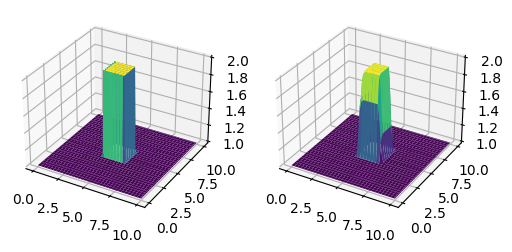

In [10]:
'''
total_disx=10
total_disy=10
total_time=0.2
'''
convection2d(10,10,0.2, 0.1,0.1,0.0001)